# Content-Based Recommender System Based on Similarity

For this case study, we are using the Electronics dataset from Amazon Reviews data source.

Our objective is to build a recommendation system to recommend products to customers based othe similarities between products.


### 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2- Getting data

In [2]:
column_names=['userId','productId','rating','timestamp']
df=pd.read_csv('ratings_Electronics (1).csv',names=column_names)

In [3]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
df.shape

(7824482, 4)

### 3- Data Cleaning

In [5]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

There is no missing data

### 4- Exploratory data analysis (EDA)

In [ ]:
###### 4-1- Rating Frequency

Text(0.5, 1.0, 'Rating frequency')

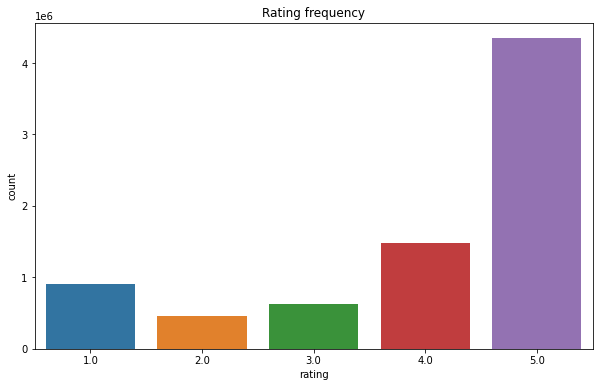

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df)
plt.title('Rating frequency')

Most users rated 5.

###### 4-2- Number of  rating for each product

In [7]:
df.groupby('productId').count()['rating'].sort_values(ascending=False)

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B0058FM5IM        1
B0058FM320        1
B0058FM0M8        1
B0058FM05U        1
0132793040        1
Name: rating, Length: 476002, dtype: int64

We choose the first (B0074BW614) product with the highest number of rating.

###### 4-3- Mean rating for each product

In [8]:
df.groupby('productId').mean()['rating'].sort_values(ascending=False)

productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
             ... 
B008LT3D6A    1.0
B00J5ARFNG    1.0
B00FAVJXUW    1.0
B0021HEJKC    1.0
B008ANKWMA    1.0
Name: rating, Length: 476002, dtype: float64

In [9]:
df_rating=pd.DataFrame({'Number of Rating':df.groupby('productId').count()['rating'], 'Mean Rating':df.groupby('productId').mean()['rating']})

In [10]:
df_rating

,Number of Rating,Mean Rating
productId,,
0132793040,1,5.000000
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852
...,...,...
BT008G3W52,1,5.000000
BT008SXQ4C,1,1.000000
BT008T2BGK,1,5.000000


###### 4-4- Histograms

Text(0.5, 1.0, 'Distribution of Mean Rating')

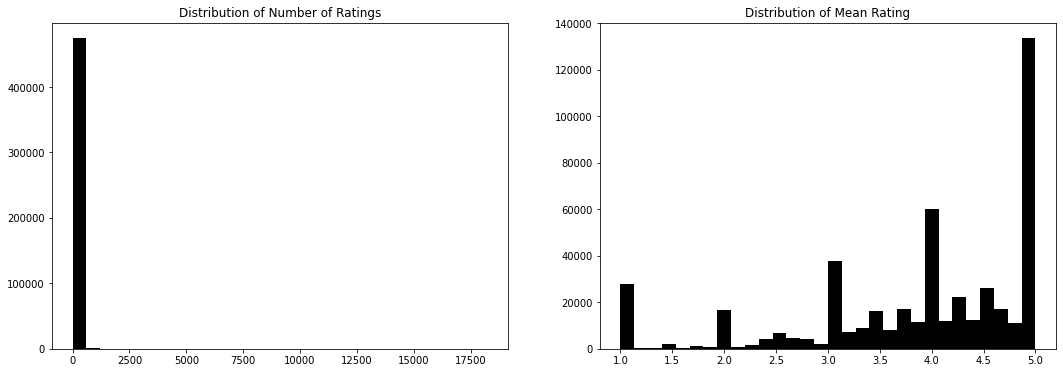

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='black')
plt.title('Distribution of Number of Ratings')

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='black')
plt.title('Distribution of Mean Rating')

From the histogram we can see that most of the number of ratings are between 0 and 1825.

###### 4-5- Scatter Plot

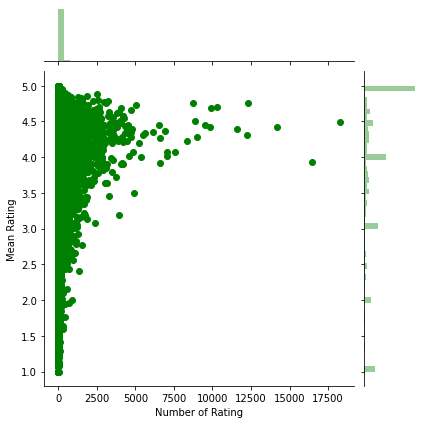

In [12]:
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_rating,color='g')

### 5- Recommender System

In order to create a pivot tabel, if we use the whole datafram (df) in the below code, there will be an error because the input data has more than 7 million rows.

In [ ]:
# The below code will give an error
mat=pd.pivot_table(data=df, values='rating', index='userId',columns='productId')

To avoid processing difficulties we filter data which only contains the customers who have given ratings more than 50 times. Since we are providing the recommendation of the Products to the customers, it is better to remove data based on the customerID rather productId.

##### 5-1- Getting the new dataframe which contains users who has given 50 or more ratings

In [15]:
new_df=df.groupby('userId').filter(lambda x: x['rating'].count()>=50)

In [16]:
new_df.shape

(125871, 4)

##### 5-2- Creating a pivot table

In [17]:
matrix=pd.pivot_table(data=new_df, values='rating', index='userId',columns='productId')

In [18]:
matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_df_rating=pd.DataFrame({'Number of Rating':new_df.groupby('productId').count()['rating'], 'Mean Rating':new_df.groupby('productId').mean()['rating']})

In [32]:
new_df_rating.sort_values(by=['Number of Rating','Mean Rating'],ascending=False)

,Number of Rating,Mean Rating
productId,,
B0088CJT4U,206,4.218447
B003ES5ZUU,184,4.864130
B000N99BBC,167,4.772455
B007WTAJTO,164,4.701220
B00829TIEK,149,4.436242
...,...,...
B00JXCIT7M,1,1.000000
B00KGHXCY8,1,1.000000
B00KIUV4KC,1,1.000000


Let's fetch the productId with the highest number of rating (B0088CJT4U) and see what other similar movies we can recommend.

###### 5-3- Products similar to the product with the highest number of rating

In [30]:
matrix.corrwith(matrix['B0088CJT4U'])

productId
0594451647   NaN
0594481813   NaN
0970407998   NaN
0972683275   NaN
1400501466   NaN
              ..
B00LED02VY   NaN
B00LGN7Y3G   NaN
B00LGQ6HL8   NaN
B00LI4ZZO8   NaN
B00LKG1MC8   NaN
Length: 48190, dtype: float64

In [24]:
corr_df=pd.DataFrame({'Correlation':matrix.corrwith(matrix['B0088CJT4U'])})

In [25]:
corr_df.head()

,Correlation
productId,
0594451647,NaN
0594481813,NaN
0970407998,NaN
0972683275,NaN
1400501466,NaN


In [26]:
correlation_df=new_df_rating.join(corr_df)

In [27]:
correlation_df.head()

,Number of Rating,Mean Rating,Correlation
productId,,,
0594451647,1,5.000000,NaN
0594481813,1,3.000000,NaN
0970407998,2,2.500000,NaN
0972683275,4,4.750000,NaN
1400501466,6,3.333333,NaN


In [31]:
correlation_df.sort_values(by=['Correlation','Number of Rating'], ascending=False)

,Number of Rating,Mean Rating,Correlation
productId,,,
B0088CJT4U,206,4.218447,1.0
B000Z80ICM,33,4.303030,1.0
B001PIBE8I,26,4.576923,1.0
B0044YU60M,21,4.190476,1.0
B00DQZQPNM,21,4.380952,1.0
...,...,...,...
B00L8QCVL6,1,5.000000,NaN
B00LBZ1Z7K,1,3.000000,NaN
B00LED02VY,1,4.000000,NaN


So if we only consider the users who have rated 50 times or more, top 5 recommendations similar to productId B0088CJT4U which has the highest number of rating include: B000Z80ICM, B001PIBE8I, B0044YU60M, B00DQZQPNM.	